# ECE449: Assignment 4
Jie Wang

Dec. 25, 2023



## Notice

> Sorry for delaying submission, I was occupied by application and final project presentation these days, forgetting to complete the assignment on time. 

> Thank you for your understanding in advance~

### `ece449_hw4_wj.pdf`
My manually calculation for the questions, including the necessary algorithm pesudo code and important step. 

### `clustering_algo.ipynb`
The python realization of questions, I implement my algorithm from sketch as it took many step to compute these data set. 



In [1]:
## Q1: Kmeans


## Q1: Kmeans

![q1](./q1.png)

The code is mainly constructed based on this post:
- Stanford-CS221: https://stanford.edu/~cpiech/cs221/handouts/kmeans.html

In [2]:
# Here is all the library I used in this assinment, 
# no sklean or other advanced ones.
import numpy as np
import matplotlib.pyplot as plt


In [3]:
point_q1 = np.array([(44, 47), (64, 67), (67, 9),  (83, 21), (83, 21),
                     (70, 88), (70, 88), (58, 65), (58, 65), (46, 88),
                     (81, 37), (25, 77), (72, 9),  (20, 80), (69, 79)])

# selected initial clustering centroids
centroids = np.array([(58, 65), (64, 67), (83, 21)])

# euclidean distance function
def dist(point1, point2):
    return np.sqrt((point1[0] - point2[0]) ** 2 + (point1[1] - point2[1]) ** 2)

def display_cluster(clusters,k,centroids):
    for k, cluster in clusters.items():
        print(f"Cluster {k+1}: {cluster}\n")
    print(f"centroids:\n[[x    y   ]]\n{centroids}")

def k_means(points, initial_centroids,k=3,iterations=10):
    centroids = initial_centroids
    for i in range(iterations):
        print(f"iteration {i+1}...")
        # assign point_q2 to centroids
        clusters = {}
        for point in points:
            distances = [dist(point, centroid) for centroid in centroids]
            min_distance = min(distances)
            assigned_centroid = distances.index(min_distance)
            if assigned_centroid not in clusters:
                clusters[assigned_centroid] = []
            clusters[assigned_centroid].append(point)
 
        # Update center
        new_centroids = []
        for cluster in clusters.values():
            new_centroids.append(np.mean(cluster, axis=0))
        new_centroids = np.array(new_centroids) 

        display_cluster(clusters,k,new_centroids)

        if np.all(centroids == new_centroids):
            break
        centroids = new_centroids


    return clusters, centroids

final_clusters, final_centroids = k_means(point_q1, centroids)



iteration 1...
Cluster 1: [array([44, 47]), array([58, 65]), array([58, 65]), array([46, 88]), array([25, 77]), array([20, 80])]

Cluster 2: [array([64, 67]), array([70, 88]), array([70, 88]), array([69, 79])]

Cluster 3: [array([67,  9]), array([83, 21]), array([83, 21]), array([81, 37]), array([72,  9])]

centroids:
[[x    y   ]]
[[41.83333333 70.33333333]
 [68.25       80.5       ]
 [77.2        19.4       ]]
iteration 2...
Cluster 1: [array([44, 47]), array([58, 65]), array([58, 65]), array([46, 88]), array([25, 77]), array([20, 80])]

Cluster 2: [array([64, 67]), array([70, 88]), array([70, 88]), array([69, 79])]

Cluster 3: [array([67,  9]), array([83, 21]), array([83, 21]), array([81, 37]), array([72,  9])]

centroids:
[[x    y   ]]
[[41.83333333 70.33333333]
 [68.25       80.5       ]
 [77.2        19.4       ]]


In [4]:
print("Here is the final clusters:")
display_cluster(final_clusters,3,final_centroids)

Here is the final clusters:
Cluster 1: [array([44, 47]), array([58, 65]), array([58, 65]), array([46, 88]), array([25, 77]), array([20, 80])]

Cluster 2: [array([64, 67]), array([70, 88]), array([70, 88]), array([69, 79])]

Cluster 3: [array([67,  9]), array([83, 21]), array([83, 21]), array([81, 37]), array([72,  9])]

centroids:
[[x    y   ]]
[[41.83333333 70.33333333]
 [68.25       80.5       ]
 [77.2        19.4       ]]


The result is visualized below:

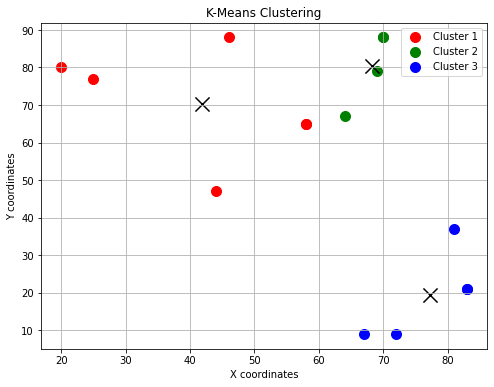

In [5]:

def plot_clusters(clusters, centroids):
    colors = ['r', 'g', 'b', 'y', 'c', 'm']
    plt.figure(figsize=(8, 6))

    for i, cluster in clusters.items():
        cluster = np.array(cluster)
        plt.scatter(cluster[:, 0], cluster[:, 1], s=100, c=colors[i], label=f'Cluster {i+1}')
        plt.scatter(centroids[i][0], centroids[i][1], s=200, c='black', marker='x')

    plt.title('K-Means Clustering')
    plt.xlabel('X coordinates')
    plt.ylabel('Y coordinates')
    plt.legend()
    plt.grid(True)
    plt.show()

plot_clusters(final_clusters, final_centroids)

## Q2: hieristical Clustering
![q2](./q2.png)

Major reference: http://www.econ.upf.edu/~michael/stanford/maeb7.pdf

In [6]:
point_q2 = np.array([(44, 47), (64, 67), (67, 9),  (83, 21), (83, 21), 
                     (70, 88), (70, 88), (58, 65), (58, 65), (46, 88)])
def hierarchical_clustering(points):
    # initialize clusters
    clusters = [[i] for i in range(len(points))]

    steps = []
    
    # Euclidean distance between two clusters
    def cluster_distance(cluster1, cluster2):
        return min(dist(points[i], points[j]) for i in cluster1 for j in cluster2)
    
    while len(clusters) > 1:
        min_distance = np.inf
        clusters_to_merge = (-1, -1)
        
        # Find the two closest clusters
        for i in range(len(clusters)):
            for j in range(i+1, len(clusters)):
                distance = cluster_distance(clusters[i], clusters[j])
                if distance < min_distance:
                    min_distance = distance
                    clusters_to_merge = (i, j)
        
        # merge the closest pairs
        new_cluster = clusters[clusters_to_merge[0]] + clusters[clusters_to_merge[1]]
        steps.append({
            'merged': (clusters[clusters_to_merge[0]], clusters[clusters_to_merge[1]]),
            'distance': min_distance,
            'new_cluster': new_cluster
        })
        
        # remove the old clusters and add the new one
        new_clusters = [clusters[i] for i in range(len(clusters)) if i not in clusters_to_merge]
        new_clusters.append(new_cluster)
        clusters = new_clusters
    
    return steps

clustering_steps = hierarchical_clustering(point_q2)

for i, step in enumerate(clustering_steps):
    print(f"Step {i+1}: Merged clusters {step['merged'][0]} and {step['merged'][1]} "
          f"at distance {step['distance']:.2f}. New cluster: {step['new_cluster']}")


Step 1: Merged clusters [3] and [4] at distance 0.00. New cluster: [3, 4]
Step 2: Merged clusters [5] and [6] at distance 0.00. New cluster: [5, 6]
Step 3: Merged clusters [7] and [8] at distance 0.00. New cluster: [7, 8]
Step 4: Merged clusters [1] and [7, 8] at distance 6.32. New cluster: [1, 7, 8]
Step 5: Merged clusters [2] and [3, 4] at distance 20.00. New cluster: [2, 3, 4]
Step 6: Merged clusters [5, 6] and [1, 7, 8] at distance 21.84. New cluster: [5, 6, 1, 7, 8]
Step 7: Merged clusters [0] and [5, 6, 1, 7, 8] at distance 22.80. New cluster: [0, 5, 6, 1, 7, 8]
Step 8: Merged clusters [9] and [0, 5, 6, 1, 7, 8] at distance 24.00. New cluster: [9, 0, 5, 6, 1, 7, 8]
Step 9: Merged clusters [2, 3, 4] and [9, 0, 5, 6, 1, 7, 8] at distance 44.42. New cluster: [2, 3, 4, 9, 0, 5, 6, 1, 7, 8]


### Existing Algorithm Check
It seems my realization fit in well with the library

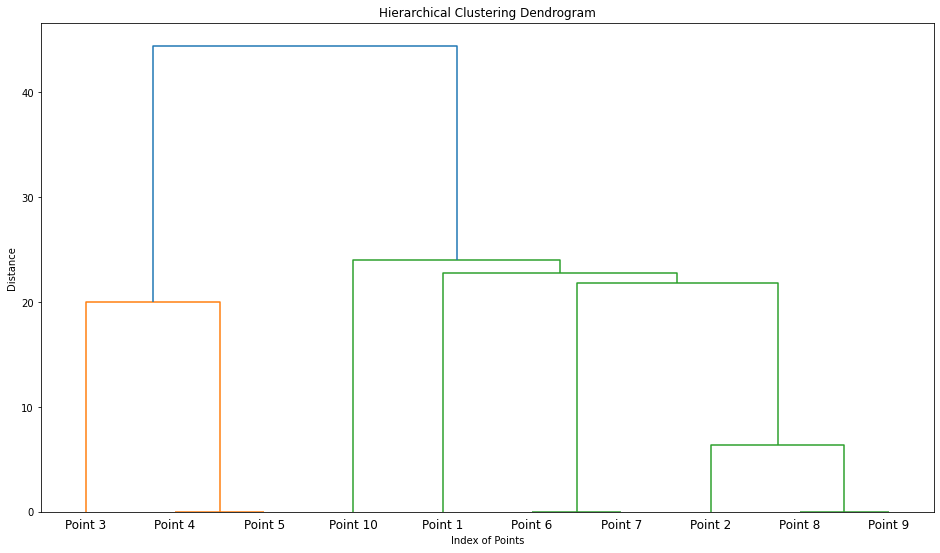

In [7]:
from scipy.spatial.distance import pdist, squareform
from scipy.cluster.hierarchy import linkage, dendrogram

# Calculate the condensed distance matrix
condensed_dist_matrix = pdist(point_q2, 'euclidean')

# Convert the condensed distance matrix to a 2D distance matrix
dist_matrix = squareform(condensed_dist_matrix)

# Perform hierarchical/agglomerative clustering
Z = linkage(condensed_dist_matrix, 'single')

# Plot dendrogram
plt.figure(figsize=(16, 9))
plt.xlabel('Index of Points')
plt.ylabel('Distance')
plt.title('Hierarchical Clustering Dendrogram')

dendrogram(Z, labels=[f'Point {i+1}' for i in range(len(point_q2))])

plt.show()


## Q3: PCA
![q3](./q3.png)

In [8]:
X = np.array([
    (44, 47, 64, 67, 67),
    (9, 83, 21, 36, 87),
    (70, 88, 88, 12, 58),
    (65, 39, 87, 46, 88),
    (81, 37, 25, 77, 72),
    (9, 20, 80, 69, 79),
    (47, 64, 82, 99, 88),
    (49, 29, 19, 19, 14),
    (39, 32, 65, 9, 57),
    (32, 31, 74, 23, 35),
])

mean = np.mean(X, axis=0)

std_dev = np.std(X, axis=0)
Xc = (X - mean) / std_dev
print(mean, '\n\n', std_dev,'\n\n', Xc, '\n')
# Compute the covariance matrix
cov_matrix = np.cov(Xc.T)
cov_matrix

[44.5 47.  60.5 45.7 64.5] 

 [22.66384786 22.28003591 26.5678377  29.36341261 23.2432786 ] 

 [[-0.02206157  0.          0.13173823  0.72539252  0.10755798]
 [-1.56637126  1.61579632 -1.48676006 -0.33034307  0.96802178]
 [ 1.12513992  1.84021247  1.03508612 -1.14768676 -0.27965074]
 [ 0.90452425 -0.35906585  0.99744662  0.0102168   1.01104497]
 [ 1.6104944  -0.44883231 -1.33620208  1.0659524   0.32267393]
 [-1.56637126 -1.21184724  0.73397016  0.7935045   0.62383626]
 [ 0.11030784  0.76301493  0.80924915  1.81518411  1.01104497]
 [ 0.1985541  -0.80789816 -1.56203905 -0.90929485 -2.17267111]
 [-0.24267724 -0.67324847  0.16937773 -1.24985473 -0.32267393]
 [-0.55153918 -0.7181317   0.50813319 -0.77307091 -1.26918412]] 



array([[ 1.11111111,  0.09703905,  0.06098726,  0.04917027, -0.10198186],
       [ 0.09703905,  1.11111111,  0.02834408, -0.06368928,  0.38234192],
       [ 0.06098726,  0.02834408,  1.11111111,  0.09464327,  0.31478776],
       [ 0.04917027, -0.06368928,  0.09464327,  1.11111111,  0.68042131],
       [-0.10198186,  0.38234192,  0.31478776,  0.68042131,  1.11111111]])

In [9]:
# Sort Eigenvalues and Eigenvectors
eigenvalues, eigenvectors = np.linalg.eig(cov_matrix)
eigenvalues,eigenvectors

(array([0.248481  , 1.96804723, 1.20944702, 1.02230231, 1.10727801]),
 array([[ 0.16885102, -0.00481615,  0.61910406,  0.35753132, -0.67848924],
        [-0.36284636, -0.28063125,  0.693557  ,  0.0200768 ,  0.55512542],
        [-0.19208855, -0.32913818,  0.10267609, -0.83187752, -0.39013773],
        [-0.5643451 , -0.5702678 , -0.35091019,  0.42238231, -0.23401811],
        [ 0.69602331, -0.6983449 , -0.04481641,  0.03662306,  0.15657647]]))

In [10]:
# Sort the eigenvectors by descending eigenvalues
sorted_indices = np.argsort(eigenvalues)[::-1]
sorted_eigenvectors = eigenvectors[:, sorted_indices]
sorted_eigenvalues = eigenvalues[sorted_indices]

k = 2
transformation_matrix = sorted_eigenvectors[:, :k]

# Transform the original data points
transformed_data_points = Xc.dot(transformation_matrix)

# Display the transformed data points
print("Transformed Data Points:")
print(transformed_data_points)


Transformed Data Points:
[[-5.32034393e-01 -2.59500029e-01]
 [-4.44178615e-01  7.07828047e-02]
 [-1.27448757e-02  2.49441745e+00]
 [-9.43773408e-01  3.64479342e-01]
 [-2.75220907e-01  1.60062182e-01]
 [-7.82114442e-01 -2.04127767e+00]
 [-2.22221104e+00 -1.70109373e-03]
 [ 2.77570727e+00 -1.81329684e-01]
 [ 1.07244425e+00 -1.46739761e-01]
 [ 1.36412616e+00 -4.59193543e-01]]


In [11]:
# Applying PCA to the Test Data
test_point = np.array([[5, 5, 5, 5, 5]])

# Standardize 
test_data_point_std = (test_point - mean) / std_dev

# Project the Test vector
transformed_test_data_point = test_data_point_std.dot(transformation_matrix)

print(f"Transformed Test Data Point:")
print(transformed_test_data_point)

Transformed Test Data Point:
[[ 3.80309275 -1.99981115]]


### Existing Algorithm Check
It seems my realization fit in well with the library

In [15]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler


# Standardizing the data
scaler = StandardScaler()
data_points_standardized = scaler.fit_transform(X)
test_data_point_standardized = scaler.transform(test_point)

# PCA transformation
pca = PCA(n_components=2)
pca.fit(data_points_standardized)

# Transform the test data point
test_data_point_pca = pca.transform(test_data_point_standardized)

# Display the results
test_data_point_pca_coordinates = test_data_point_pca[0]
test_data_point_pca_coordinates


array([ 3.80309275, -1.99981115])

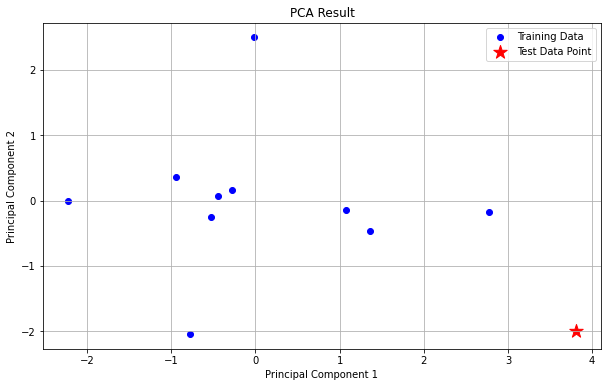

In [16]:

# Re-performing PCA on the entire dataset including both training and test data points
data_points_with_test = np.vstack([X, test_point])
data_points_with_test_standardized = scaler.transform(data_points_with_test)
data_points_with_test_pca = pca.transform(data_points_with_test_standardized)

# Separate the PCA results into training and test for plotting
training_pca = data_points_with_test_pca[:-1, :]
test_pca = data_points_with_test_pca[-1, :]

# Plotting the PCA results
plt.figure(figsize=(10, 6))
plt.scatter(training_pca[:, 0], training_pca[:, 1], c='blue', label='Training Data')
plt.scatter(test_pca[0], test_pca[1], c='red', marker='*', s=200, label='Test Data Point')
plt.title('PCA Result')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend()
plt.grid(True)
plt.show()


## Q4: EM on a GMM
![q4](./q4.png)
### Initial Parameters:
- Component 1: Mean (μ1) = 5, Variance (σ1^2) = 2, Mixing Coefficient (π1) = 0.5
- Component 2: Mean (μ2) = 15, Variance (σ2^2) = 2, Mixing Coefficient (π2) = 0.5

### Data Points:
$ X = \{12, 15, 0, 3, 3, 7, 9, 19, 18, 4\} $

1. **Expectation (E) step**: Calculate the probabilities that each data point was generated by each component of the mixture model.
2. **Maximization (M) step**: Update the parameters of the model to maximize the likelihood of the data given these probabilities.



In [17]:
import numpy as np

X = np.array([12, 15, 0, 3, 3, 7, 9, 19, 18, 4])
mu1 = 5
sigma1_squared = 2
mu2 = 15
sigma2_squared = 2
pi1 = 0.5
pi2 = 0.5

def gaussian_pdf(x, mu, sigma_squared):
    return (1 / np.sqrt(2 * np.pi * sigma_squared)) * np.exp(-((x - mu) ** 2) / (2 * sigma_squared))

def expectation_step(X, mu1, sigma1_squared, mu2, sigma2_squared, pi1, pi2):
    weights = []
    for x in X:
        p_x_mu1 = gaussian_pdf(x, mu1, sigma1_squared)
        p_x_mu2 = gaussian_pdf(x, mu2, sigma2_squared)
        
        weight1 = pi1 * p_x_mu1
        weight2 = pi2 * p_x_mu2
        weight_sum = weight1 + weight2
        
        weights.append((weight1 / weight_sum, weight2 / weight_sum))
    return np.array(weights)

def maximization_step(X, weights):
    mu1 = np.sum(weights[:, 0] * X) / np.sum(weights[:, 0])
    mu2 = np.sum(weights[:, 1] * X) / np.sum(weights[:, 1])
    sigma1_squared = np.sum(weights[:, 0] * (X - mu1) ** 2) / np.sum(weights[:, 0])
    sigma2_squared = np.sum(weights[:, 1] * (X - mu2) ** 2) / np.sum(weights[:, 1])
    pi1 = np.mean(weights[:, 0])
    pi2 = np.mean(weights[:, 1])
    
    return mu1, sigma1_squared, mu2, sigma2_squared, pi1, pi2



weights = expectation_step(X, mu1, sigma1_squared, mu2, sigma2_squared, pi1, pi2)
mu1_new, sigma1_squared_new, mu2_new, sigma2_squared_new, pi1_new, pi2_new = maximization_step(X, weights)

print("Updated parameters after one iteration:")
print(f"Component 1: Mean = {mu1_new}, Variance = {sigma1_squared_new}, Mixing Coefficient = {pi1_new}")
print(f"Component 2: Mean = {mu2_new}, Variance = {sigma2_squared_new}, Mixing Coefficient = {pi2_new}")


Updated parameters after one iteration:
Component 1: Mean = 4.32817994532351, Variance = 8.541144070717609, Mixing Coefficient = 0.5993352241055984
Component 2: Mean = 15.988351579447357, Variance = 7.569096733038601, Mixing Coefficient = 0.40066477589440164
